# Non-OpenAI Models

AutoGen allows you to use non-OpenAI models through proxy servers that provide an OpenAI-compatible API or a custom model client class.

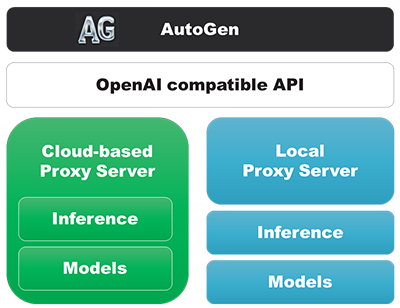

Examples of using cloud-based proxy servers providers that have an OpenAI-compatible API are provided below:

Together AI example
Mistral AI example
Anthropic Claude example

### Tips for Non-OpenAI Models

Finding the right model

Validating the program

Chat template 


```groupchat = autogen.GroupChat(
    agents=[user_proxy, coder, pm],
    messages=[],
    max_round=12,
    # Role for select speaker message will be set to 'user' instead of 'system'
    role_for_select_speaker_messages='user',
)
```
### Anthropic Claude

Claude is a family of large language models developed by Anthropic and designed to revolutionize the way you interact with AI. Claude excels at a wide variety of tasks involving language, reasoning, analysis, coding, and more. 

#### Features
Additionally, this client class provides support for function/tool calling and will track token usage and cost correctly as per Anthropic’s API costs (as of June 2024).

#### Requirements
To use Anthropic Claude with AutoGen, first you need to install the autogen-agentchat[anthropic] package.


In [ ]:
import os

from typing_extensions import Annotated

import autogen

config_list_claude = [
    {
        # Choose your model name.
        "model": "claude-3-5-sonnet-20240620",
        # You need to provide your API key here.
        # "apikey",
        "api_type": "anthropic",
    }
]

c:\Users\sides\.conda\envs\autogen\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
flaml.automl is not available. Please install flaml[automl] to enable AutoML functionalities.


### Two-agent Coding Example

#### Construct Agents
Construct a simple conversation between a User proxy and an ConversableAgent based on Claude-3 model.


In [2]:
assistant = autogen.AssistantAgent(
    "assistant",
    llm_config={
        "config_list": config_list_claude,
    },
)

user_proxy = autogen.UserProxyAgent(
    "user_proxy",
    human_input_mode="NEVER",
    code_execution_config={
        "work_dir": "coding",
        "use_docker": False,
    },
    is_termination_msg=lambda x: x.get("content", "") and x.get("content", "").rstrip().endswith("TERMINATE"),
    max_consecutive_auto_reply=1,
)

In [4]:
user_proxy.initiate_chat(
    assistant, message="Write a python program to print the first 10 numbers of the Fibonacci sequence."
)

user_proxy (to assistant):

Write a python program to print the first 10 numbers of the Fibonacci sequence.

--------------------------------------------------------------------------------


BadRequestError: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}

### Tool Call Example with the Latest Anthropic API

#### Register the function

In [5]:
@user_proxy.register_for_execution()  # Decorator factory for registering a function to be executed by an agent
@assistant.register_for_llm(
    name="get_weather", description="Get the current weather in a given location."
)  # Decorator factory for registering a function to be used by an agent
def preprocess(location: Annotated[str, "The city and state, e.g. Toronto, ON."]) -> str:
    return "Absolutely cloudy and rainy"

In [ ]:
user_proxy.initiate_chat(
    assistant,
    message="What's the weather in Toronto?",
)

In [ ]:
ChatResult(chat_id=None, chat_history=[{'content': "What's the weather in Toronto?", 'role': 'assistant'}, {'content': "To get the weather in Toronto, we can use the available `get_weather` function. Let's call it to retrieve the current weather information for Toronto.", 'tool_calls': [{'id': 'toolu_01KFiJWsMwTbcWerTHCgytuX', 'function': {'arguments': '{"location": "Toronto, ON"}', 'name': 'get_weather'}, 'type': 'function'}], 'role': 'assistant'}, {'content': 'Absolutely cloudy and rainy', 'tool_responses': [{'tool_call_id': 'toolu_01KFiJWsMwTbcWerTHCgytuX', 'role': 'tool', 'content': 'Absolutely cloudy and rainy'}], 'role': 'tool'}, {'content': 'Based on the information provided by the weather tool, the current weather in Toronto, ON is absolutely cloudy and rainy.\n\nTo provide a more detailed explanation:\n\n1. Cloud cover: The weather is described as "absolutely cloudy," which means the sky is likely completely overcast with clouds. This suggests there is little to no visible sunlight making it through the cloud cover.\n\n2. Precipitation: It is also reported as "rainy," indicating that there is ongoing rainfall in Toronto. The intensity of the rain isn\'t specified, so it could range from a light drizzle to a heavier downpour.\n\nThis weather condition is not uncommon for Toronto, as the city can experience various types of weather throughout the year. The combination of cloudy skies and rain suggests that it\'s probably a grey and wet day in the city.\n\nIf you need any more specific information about the weather in Toronto or have any other questions, please feel free to ask.\n\nTERMINATE', 'role': 'user'}], summary='Based on the information provided by the weather tool, the current weather in Toronto, ON is absolutely cloudy and rainy.\n\nTo provide a more detailed explanation:\n\n1. Cloud cover: The weather is described as "absolutely cloudy," which means the sky is likely completely overcast with clouds. This suggests there is little to no visible sunlight making it through the cloud cover.\n\n2. Precipitation: It is also reported as "rainy," indicating that there is ongoing rainfall in Toronto. The intensity of the rain isn\'t specified, so it could range from a light drizzle to a heavier downpour.\n\nThis weather condition is not uncommon for Toronto, as the city can experience various types of weather throughout the year. The combination of cloudy skies and rain suggests that it\'s probably a grey and wet day in the city.\n\nIf you need any more specific information about the weather in Toronto or have any other questions, please feel free to ask.\n\n', cost={'usage_including_cached_inference': {'total_cost': 0.009786, 'claude-3-5-sonnet-20240620': {'cost': 0.009786, 'prompt_tokens': 1782, 'completion_tokens': 296, 'total_tokens': 2078}}, 'usage_excluding_cached_inference': {'total_cost': 0.009786, 'claude-3-5-sonnet-20240620': {'cost': 0.009786, 'prompt_tokens': 1782, 'completion_tokens': 296, 'total_tokens': 2078}}}, human_input=[])

### Group Chat Example with both Claude and GPT Agents

In [ ]:
from autogen import AssistantAgent, GroupChat, GroupChatManager, UserProxyAgent

config_list_gpt4 = [
    {
        # Choose your model name.
        "model": "gpt-4",
        # You need to provide your API key here.
        # "apikey",
        "api_type": "openai",
    }
]


config_list_gpt35 = [
    {
        # Choose your model name.
        "model": "gpt-3.5-turbo",
        # You need to provide your API key here.
        # "apikey",
        "api_type": "openai",
    }
]

alice = AssistantAgent(
    "Openai_agent",
    system_message="You are from OpenAI. You make arguments to support your company's position.",
    llm_config={
        "config_list": config_list_gpt4,
    },
)

bob = autogen.AssistantAgent(
    "Anthropic_agent",
    system_message="You are from Anthropic. You make arguments to support your company's position.",
    llm_config={
        "config_list": config_list_claude,
    },
)

charlie = AssistantAgent(
    "Research_Assistant",
    system_message="You are a helpful assistant to research the latest news and headlines.",
    llm_config={
        "config_list": config_list_gpt35,
    },
)

dan = AssistantAgent(
    "Judge",
    system_message="You are a judge. You will evaluate the arguments and make a decision on which one is more convincing.",
    llm_config={
        "config_list": config_list_gpt4,
    },
)

code_interpreter = UserProxyAgent(
    "code-interpreter",
    human_input_mode="NEVER",
    code_execution_config={
        "work_dir": "coding",
        "use_docker": False,
    },
    default_auto_reply="",
    is_termination_msg=lambda x: x.get("content", "").find("TERMINATE") >= 0,
)


@code_interpreter.register_for_execution()  # Decorator factory for registering a function to be executed by an agent
@charlie.register_for_llm(
    name="get_headlines", description="Get the headline of a particular day."
)  # Decorator factory for registering a function to be used by an agent
def get_headlines(headline_date: Annotated[str, "Date in MMDDYY format, e.g., 06192024"]) -> str:
    mock_news = {
        "06202024": "OpenAI competitor Anthropic announces its most powerful AI yet.",
        "06192024": "OpenAI founder Sutskever sets up new AI company devoted to safe superintelligence.",
    }
    return mock_news.get(headline_date, "No news available for today.")


groupchat = GroupChat(
    agents=[alice, bob, charlie, dan, code_interpreter],
    messages=[],
    allow_repeat_speaker=False,
    max_round=10,
)

manager = GroupChatManager(
    groupchat=groupchat,
    llm_config={
        "config_list": config_list_gpt4,
    },
)

task = "Analyze the potential of OpenAI and Anthropic to revolutionize the field of AI based on today's headlines. Today is 06202024."

user_proxy = UserProxyAgent(
    "user_proxy",
    human_input_mode="NEVER",
    code_execution_config=False,
    default_auto_reply="",
    # is_termination_msg=lambda x: True,
)

user_proxy.initiate_chat(manager, message=task)

In [ ]:
ChatResult(chat_id=None, chat_history=[{'content': "Analyze the potential of OpenAI and Anthropic to revolutionize the field of AI based on today's headlines. Today is 06202024.", 'role': 'assistant'}], summary="Analyze the potential of OpenAI and Anthropic to revolutionize the field of AI based on today's headlines. Today is 06202024.", cost={'usage_including_cached_inference': {'total_cost': 0}, 'usage_excluding_cached_inference': {'total_cost': 0}}, human_input=[])

### Amazon Bedrock

AutoGen allows you to use Amazon’s generative AI Bedrock service to run inference with a number of open-weight models and as well as their own models.

Amazon Bedrock supports models from providers such as Meta, Anthropic, Cohere, and Mistral.

Here’s a more detailed and streamlined version:  

#### Model Support:  
   - **Amazon Bedrock**: Offers diverse capabilities, including text generation, image classification, and image generation.  
   - **AutoGen**: Currently supports text generation and image classification by passing images to the LLM.  
   - **Limitations**: AutoGen does not yet support image generation; contributions are welcome to expand this capability.  

#### Requirements:  
   - To integrate Amazon Bedrock with AutoGen, install the `autogen-agentchat[bedrock]` package using your Python environment.  
   - Ensure proper configuration to connect with Bedrock services for optimal functionality.  

#### Pricing Considerations:  
   - **Cost Structure**: Pricing is region-specific and based on token usage, making it impractical to maintain model-region cost combinations within AutoGen.  
   - **Configuration**: Add cost information (per 1,000 input and output tokens) in your setup to manage expenses effectively.  
   - Review Amazon’s documentation for up-to-date pricing details tailored to your deployment region.


Here’s a detailed and clear configuration setup for Amazon Bedrock:  

### **Setting up Amazon Bedrock Configuration**  

To authenticate and configure Amazon Bedrock, follow these steps:  

#### Authentication Parameters  
   - Amazon Bedrock does not use `api_key` for authentication like other providers. Instead, the following fields are required:  
     - **Mandatory**:  
       - `aws_region`: Specify the AWS region (e.g., `us-east-1`).  
     - **Optional (can use environment variables)**:  
       - `aws_access_key` (or `AWS_ACCESS_KEY`)  
       - `aws_secret_key` (or `AWS_SECRET_KEY`)  
       - `aws_session_token` (or `AWS_SESSION_TOKEN`)  
       - `aws_profile_name`: Name of the AWS profile (if applicable).  

#### Essential Parameters  
   - **api_type**: Set to `"bedrock"`.  
   - **model**: Specify the model you want to use.  

#### Common Parameters for All Models  
   - **temperature**: Controls randomness in output (e.g., 0.7 for balanced creativity).  
   - **topP**: Nucleus sampling parameter, typically a value between 0 and 1.  
   - **maxTokens**: Sets the maximum number of tokens for the output.  

#### Model-Specific Parameters  
   Additional parameters may be included depending on the chosen model. Supported ones are:  
   - `top_p`: Adjusts probability sampling.  
   - `top_k`: Limits sampling to the top K options.  
   - `k`: A related sampling parameter (model-dependent).  
   - `seed`: For reproducible outputs.  

#### System Prompt Support
   - By default, `supports_system_prompts` is set to `True`.  
   - If the model does not support separate system prompts (e.g., Mistral’s Instruct models), set this parameter to `False`.  

#### Example Configuration  
Here’s an example of a configuration object in Python:  

```python
config = {
    "aws_region": "us-east-1",  # Mandatory
    "aws_access_key": "YOUR_AWS_ACCESS_KEY",  # Optional, use env variable if available
    "aws_secret_key": "YOUR_AWS_SECRET_KEY",  # Optional, use env variable if available
    "aws_session_token": "YOUR_AWS_SESSION_TOKEN",  # Optional, use env variable if available
    "aws_profile_name": "default",  # Optional
    "api_type": "bedrock",  # Mandatory
    "model": "MODEL_NAME",  # Replace with the specific model name
    "temperature": 0.7,  # Common parameter
    "topP": 0.9,  # Common parameter
    "maxTokens": 512,  # Common parameter
    "top_p": 0.85,  # Model-specific
    "top_k": 50,  # Model-specific
    "seed": 42,  # Optional
    "supports_system_prompts": True,  # Set to False for models that don't support this feature
}
```  

### Cerebras


Cerebras has developed the Wafer-Scale Engine-3 (WSE-3), the world’s largest and fastest AI processor. The CS-3 system supports running large language models like Llama-3.1-8B and Llama-3.1-70B with exceptional speed, ideal for demanding AI workloads.

It is possible to adapt AutoGen to work with Cerebras’ API by updating the base_url. However, minor differences in parameter support may need adjustments. This integration also enables cost tracking based on actual token usage.

```python
[
    {
        "model": "llama3.1-8b",
        # "apikey",
        "api_type": "cerebras"
    },
    {
        "model": "llama3.1-70b",
        # "apikey",
        "api_type": "cerebras"
    }
]
```

#### API parameters
The following parameters can be added to your config for the Cerebras API. See this link for further information on them and their default values.

- max_tokens (null, integer >= 0)

- seed (number)

- stream (True or False)

- temperature (number 0..1.5)

- top_p (number)

In [ ]:
import os
# Set your API keys as environment variables
os.environ["CEREBRAS_API_KEY"] = "csk-6j3yv9rpcy3hfxtj8ktn5jmmy4ywjtd92krhvf8ktp58fh65"
os.environ["OPENAI_API_KEY"] = apikey
# Define the config_list
# Update with a valid model
config_list = [{"model": "gpt-3.5-turbo"}]  # Replace with an available model



In [18]:
from pathlib import Path

from autogen import AssistantAgent, UserProxyAgent
from autogen.coding import LocalCommandLineCodeExecutor

# Setting up the code executor
workdir = Path("coding")
workdir.mkdir(exist_ok=True)
code_executor = LocalCommandLineCodeExecutor(work_dir=workdir)

# Setting up the agents

# The UserProxyAgent will execute the code that the AssistantAgent provides
user_proxy_agent = UserProxyAgent(
    name="User",
    code_execution_config={"executor": code_executor},
    is_termination_msg=lambda msg: "FINISH" in msg.get("content"),
)

system_message = """You are a helpful AI assistant who writes code and the user executes it.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) for the user to execute.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feedback or perform any other action beyond executing the code you suggest. The user can't modify your code. So do not suggest incomplete code which requires users to modify. Don't use a code block if it's not intended to be executed by the user.
Don't include multiple code blocks in one response. Do not ask users to copy and paste the result. Instead, use 'print' function for the output when relevant. Check the execution result returned by the user.
If the result indicates there is an error, fix the error and output the code again. Suggest the full code instead of partial code or code changes. If the error can't be fixed or if the task is not solved even after the code is executed successfully, analyze the problem, revisit your assumption, collect additional info you need, and think of a different approach to try.
When you find an answer, verify the answer carefully. Include verifiable evidence in your response if possible.
IMPORTANT: Wait for the user to execute your code and then you can reply with the word "FINISH". DO NOT OUTPUT "FINISH" after your code block."""

# The AssistantAgent, using Llama-3.1-70B on Cerebras Inference, will take the coding request and return code
assistant_agent = AssistantAgent(
    name="Cerebras Assistant",
    system_message=system_message,
    llm_config={"config_list": config_list},
)

In [19]:
# Start the chat, with the UserProxyAgent asking the AssistantAgent the message
chat_result = user_proxy_agent.initiate_chat(
    assistant_agent,
    message="Provide code to count the number of prime numbers from 1 to 10000.",
)

User (to Cerebras Assistant):

Provide code to count the number of prime numbers from 1 to 10000.

--------------------------------------------------------------------------------
Cerebras Assistant (to User):

```python
def is_prime(num):
    if num < 2:
        return False
    for i in range(2, int(num ** 0.5) + 1):
        if num % i == 0:
            return False
    return True

count = 0
for num in range(1, 10001):
    if is_prime(num):
        count += 1

print(count)
```


--------------------------------------------------------------------------------


In [ ]:
import json
import os
from typing import Literal

from typing_extensions import Annotated

import autogen

config_list = [
    {
        "model": "llama3.1-70b",
        # "apikey",
        "api_type": "cerebras",
    }
]

In [25]:
# Create the agent for tool calling
chatbot = autogen.AssistantAgent(
    name="chatbot",
    system_message="""
        For currency exchange and weather forecasting tasks,
        only use the functions you have been provided with.
        When you summarize, make sure you've considered ALL previous instructions.
        Output 'HAVE FUN!' when an answer has been provided.
    """,
    llm_config={"config_list": config_list},
)

# Note that we have changed the termination string to be "HAVE FUN!"
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    is_termination_msg=lambda x: x.get("content", "") and "HAVE FUN!" in x.get("content", ""),
    human_input_mode="NEVER",
    max_consecutive_auto_reply=1,
)

In [26]:
# Currency Exchange function

CurrencySymbol = Literal["USD", "EUR"]

# Define our function that we expect to call


def exchange_rate(base_currency: CurrencySymbol, quote_currency: CurrencySymbol) -> float:
    if base_currency == quote_currency:
        return 1.0
    elif base_currency == "USD" and quote_currency == "EUR":
        return 1 / 1.1
    elif base_currency == "EUR" and quote_currency == "USD":
        return 1.1
    else:
        raise ValueError(f"Unknown currencies {base_currency}, {quote_currency}")


# Register the function with the agent


@user_proxy.register_for_execution()
@chatbot.register_for_llm(description="Currency exchange calculator.")
def currency_calculator(
    base_amount: Annotated[float, "Amount of currency in base_currency"],
    base_currency: Annotated[CurrencySymbol, "Base currency"] = "USD",
    quote_currency: Annotated[CurrencySymbol, "Quote currency"] = "EUR",
) -> str:
    quote_amount = exchange_rate(base_currency, quote_currency) * base_amount
    return f"{format(quote_amount, '.2f')} {quote_currency}"


# Weather function


# Example function to make available to model
def get_current_weather(location, unit="fahrenheit"):
    """Get the weather for some location"""
    if "chicago" in location.lower():
        return json.dumps({"location": "Chicago", "temperature": "13", "unit": unit})
    elif "san francisco" in location.lower():
        return json.dumps({"location": "San Francisco", "temperature": "55", "unit": unit})
    elif "new york" in location.lower():
        return json.dumps({"location": "New York", "temperature": "11", "unit": unit})
    else:
        return json.dumps({"location": location, "temperature": "unknown"})


# Register the function with the agent


@user_proxy.register_for_execution()
@chatbot.register_for_llm(description="Weather forecast for US cities.")
def weather_forecast(
    location: Annotated[str, "City name"],
) -> str:
    weather_details = get_current_weather(location=location)
    weather = json.loads(weather_details)
    return f"{weather['location']} will be {weather['temperature']} degrees {weather['unit']}"

In [27]:
import time

start_time = time.time()

# start the conversation
res = user_proxy.initiate_chat(
    chatbot,
    message="What's the weather in New York and can you tell me how much is 123.45 EUR in USD so I can spend it on my holiday? Throw a few holiday tips in as well.",
    summary_method="reflection_with_llm",
)

end_time = time.time()

print(f"LLM SUMMARY: {res.summary['content']}\n\nDuration: {(end_time - start_time) * 1000}ms")

user_proxy (to chatbot):

What's the weather in New York and can you tell me how much is 123.45 EUR in USD so I can spend it on my holiday? Throw a few holiday tips in as well.

--------------------------------------------------------------------------------
chatbot (to user_proxy):

***** Suggested tool call (e1647a129): weather_forecast *****
Arguments: 
{"location": "New York"}
*************************************************************
***** Suggested tool call (87bf00691): currency_calculator *****
Arguments: 
{"base_amount": 123.45, "base_currency": "EUR", "quote_currency": "USD"}
****************************************************************

--------------------------------------------------------------------------------

>>>>>>>> EXECUTING FUNCTION weather_forecast...

>>>>>>>> EXECUTING FUNCTION currency_calculator...
user_proxy (to chatbot):

user_proxy (to chatbot):

***** Response from calling tool (e1647a129) *****
New York will be 11 degrees fahrenheit
**************

### Cohere 

Cohere is a cloud based platform serving their own LLMs, in particular the Command family of models.

Cohere’s API differs from OpenAI’s, which is the native API used by AutoGen, so to use Cohere’s LLMs you need to use this library.

#### Features
When using this client class, AutoGen’s messages are automatically tailored to accommodate the specific requirements of Cohere’s API.

#### API parameters

The following parameters can be added to your config for the Cohere API. See this link for further information on them and their default values.

- temperature (number > 0)

- p (number 0.01..0.99)

- k (number 0..500)

- max_tokens (null, integer >= 0)

- seed (null, integer)

- frequency_penalty (number 0..1)

- presence_penalty (number 0..1)

- client_name (null, string)

In [ ]:
import os

config_list = [
    {
        # Let's choose the Command-R model
        "model": "command-r",
        # Provide your Cohere's API key here or put it into the COHERE_API_KEY environment variable.
       # "apikey",
        # We specify the API Type as 'cohere' so it uses the Cohere client class
        "api_type": "cohere",
    }
]

In [2]:
from pathlib import Path

from autogen import AssistantAgent, UserProxyAgent
from autogen.coding import LocalCommandLineCodeExecutor

# Setting up the code executor
workdir = Path("coding")
workdir.mkdir(exist_ok=True)
code_executor = LocalCommandLineCodeExecutor(work_dir=workdir)

# Setting up the agents

# The UserProxyAgent will execute the code that the AssistantAgent provides
user_proxy_agent = UserProxyAgent(
    name="User",
    code_execution_config={"executor": code_executor},
    is_termination_msg=lambda msg: "FINISH" in msg.get("content"),
)

system_message = """You are a helpful AI assistant who writes code and the user executes it.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) for the user to execute.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feedback or perform any other action beyond executing the code you suggest. The user can't modify your code. So do not suggest incomplete code which requires users to modify. Don't use a code block if it's not intended to be executed by the user.
Don't include multiple code blocks in one response. Do not ask users to copy and paste the result. Instead, use 'print' function for the output when relevant. Check the execution result returned by the user.
If the result indicates there is an error, fix the error and output the code again. Suggest the full code instead of partial code or code changes. If the error can't be fixed or if the task is not solved even after the code is executed successfully, analyze the problem, revisit your assumption, collect additional info you need, and think of a different approach to try.
When you find an answer, verify the answer carefully. Include verifiable evidence in your response if possible.
IMPORTANT: Wait for the user to execute your code and then you can reply with the word "FINISH". DO NOT OUTPUT "FINISH" after your code block."""

# The AssistantAgent, using Cohere's model, will take the coding request and return code
assistant_agent = AssistantAgent(
    name="Cohere Assistant",
    system_message=system_message,
    llm_config={"config_list": config_list},
)

In [3]:
# Start the chat, with the UserProxyAgent asking the AssistantAgent the message
chat_result = user_proxy_agent.initiate_chat(
    assistant_agent,
    message="Provide code to count the number of prime numbers from 1 to 10000.",
)

User (to Cohere Assistant):

Provide code to count the number of prime numbers from 1 to 10000.

--------------------------------------------------------------------------------
Cohere Assistant (to User):

Here's the code to count the number of prime numbers from 1 to 10,000:
```python
def is_prime(n):
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6
    return True

count = 0
for num in range(1, 10001):
    if is_prime(num):
        count += 1

print(count)
```

My plan is to first write a function to determine if a given number is prime. Then loop through each number from 1 to 10,000 and increment a counter for each prime number found.

FINISH

--------------------------------------------------------------------------------
User (to Cohere Assistant):

code to find sum of n numbers in linkedlist

In [ ]:
import json
import os
from typing import Literal

from typing_extensions import Annotated

import autogen

config_list = [
    {"api_type": "cohere", "model": "command-r-plus", # "apikey", "cache_seed": None}
]

In [7]:
# Create the agent for tool calling
chatbot = autogen.AssistantAgent(
    name="chatbot",
    system_message="""For currency exchange and weather forecasting tasks,
        only use the functions you have been provided with.
        Output 'HAVE FUN!' when an answer has been provided.""",
    llm_config={"config_list": config_list},
)

# Note that we have changed the termination string to be "HAVE FUN!"
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    is_termination_msg=lambda x: x.get("content", "") and "HAVE FUN!" in x.get("content", ""),
    human_input_mode="NEVER",
    max_consecutive_auto_reply=1,
)

In [8]:
# Currency Exchange function

CurrencySymbol = Literal["USD", "EUR"]

# Define our function that we expect to call


def exchange_rate(base_currency: CurrencySymbol, quote_currency: CurrencySymbol) -> float:
    if base_currency == quote_currency:
        return 1.0
    elif base_currency == "USD" and quote_currency == "EUR":
        return 1 / 1.1
    elif base_currency == "EUR" and quote_currency == "USD":
        return 1.1
    else:
        raise ValueError(f"Unknown currencies {base_currency}, {quote_currency}")


# Register the function with the agent


@user_proxy.register_for_execution()
@chatbot.register_for_llm(description="Currency exchange calculator.")
def currency_calculator(
    base_amount: Annotated[float, "Amount of currency in base_currency"],
    base_currency: Annotated[CurrencySymbol, "Base currency"] = "USD",
    quote_currency: Annotated[CurrencySymbol, "Quote currency"] = "EUR",
) -> str:
    quote_amount = exchange_rate(base_currency, quote_currency) * base_amount
    return f"{format(quote_amount, '.2f')} {quote_currency}"


# Weather function


# Example function to make available to model
def get_current_weather(location, unit="fahrenheit"):
    """Get the weather for some location"""
    if "chicago" in location.lower():
        return json.dumps({"location": "Chicago", "temperature": "13", "unit": unit})
    elif "san francisco" in location.lower():
        return json.dumps({"location": "San Francisco", "temperature": "55", "unit": unit})
    elif "new york" in location.lower():
        return json.dumps({"location": "New York", "temperature": "11", "unit": unit})
    else:
        return json.dumps({"location": location, "temperature": "unknown"})


# Register the function with the agent


@user_proxy.register_for_execution()
@chatbot.register_for_llm(description="Weather forecast for US cities.")
def weather_forecast(
    location: Annotated[str, "City name"],
) -> str:
    weather_details = get_current_weather(location=location)
    weather = json.loads(weather_details)
    return f"{weather['location']} will be {weather['temperature']} degrees {weather['unit']}"

In [9]:
# start the conversation
res = user_proxy.initiate_chat(
    chatbot,
    message="What's the weather in New York and can you tell me how much is 123.45 EUR in USD so I can spend it on my holiday? Throw a few holiday tips in as well.",
    summary_method="reflection_with_llm",
)

print(f"LLM SUMMARY: {res.summary['content']}")

user_proxy (to chatbot):

What's the weather in New York and can you tell me how much is 123.45 EUR in USD so I can spend it on my holiday? Throw a few holiday tips in as well.

--------------------------------------------------------------------------------
chatbot (to user_proxy):

I will use the weather_forecast and currency_calculator tools to answer the first two parts of the request. I will then use the directly_answer tool to respond to the final part of the request.
***** Suggested tool call (61311): weather_forecast *****
Arguments: 
{"location": "New York"}
*********************************************************
***** Suggested tool call (64022): currency_calculator *****
Arguments: 
{"base_amount": 123.45, "base_currency": "EUR", "quote_currency": "USD"}
************************************************************

--------------------------------------------------------------------------------

>>>>>>>> EXECUTING FUNCTION weather_forecast...

>>>>>>>> EXECUTING FUNCTION c

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

### Gemini 

In [10]:
import os
from typing import Any, Callable, Dict, List, Optional, Tuple, Type, Union

import chromadb
from PIL import Image
from termcolor import colored

import autogen
from autogen import Agent, AssistantAgent, ConversableAgent, UserProxyAgent
from autogen.agentchat.contrib.img_utils import _to_pil, get_image_data
from autogen.agentchat.contrib.multimodal_conversable_agent import MultimodalConversableAgent
from autogen.agentchat.contrib.retrieve_user_proxy_agent import RetrieveUserProxyAgent
from autogen.code_utils import DEFAULT_MODEL, UNKNOWN, content_str, execute_code, extract_code, infer_lang

In [ ]:
assistant = AssistantAgent(
    "assistant", llm_config={"config_list": config_list_gemini, "seed": seed}, max_consecutive_auto_reply=3
)

user_proxy = UserProxyAgent(
    "user_proxy",
    code_execution_config={"work_dir": "coding", "use_docker": False},
    human_input_mode="NEVER",
    is_termination_msg=lambda x: content_str(x.get("content")).find("TERMINATE") >= 0,
)

result = user_proxy.initiate_chat(assistant, message="Sort the array with Bubble Sort: [4, 1, 5, 2, 3]")

### Groq

Groq is a cloud based platform serving a number of popular open weight models at high inference speeds. Models include Meta’s Llama 3, Mistral AI’s Mixtral, and Google’s Gemma.

Although Groq’s API is aligned well with OpenAI’s, which is the native API used by AutoGen, this library provides the ability to set specific parameters as well as track API costs.

In [ ]:
[
    {
        "model": "llama3-8b-8192",
        # "apikey",
        "api_type": "groq",
        "frequency_penalty": 0.5,
        "max_tokens": 2048,
        "presence_penalty": 0.2,
        "seed": 42,
        "temperature": 0.5,
        "top_p": 0.2
    }
]

In [ ]:
import os

config_list = [
    {
        # Let's choose the Llama 3 model
        "model": "llama3-8b-8192",
        # Put your Groq API key here or put it into the GROQ_API_KEY environment variable.
        # "apikey"),
        # We specify the API Type as 'groq' so it uses the Groq client class
        "api_type": "groq",
    }
]

In [ ]:
from pathlib import Path

from autogen import AssistantAgent, UserProxyAgent
from autogen.coding import LocalCommandLineCodeExecutor

# Setting up the code executor
workdir = Path("coding")
workdir.mkdir(exist_ok=True)
code_executor = LocalCommandLineCodeExecutor(work_dir=workdir)

# Setting up the agents

# The UserProxyAgent will execute the code that the AssistantAgent provides
user_proxy_agent = UserProxyAgent(
    name="User",
    code_execution_config={"executor": code_executor},
    is_termination_msg=lambda msg: "FINISH" in msg.get("content"),
)

system_message = """You are a helpful AI assistant who writes code and the user executes it.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) for the user to execute.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feedback or perform any other action beyond executing the code you suggest. The user can't modify your code. So do not suggest incomplete code which requires users to modify. Don't use a code block if it's not intended to be executed by the user.
Don't include multiple code blocks in one response. Do not ask users to copy and paste the result. Instead, use 'print' function for the output when relevant. Check the execution result returned by the user.
If the result indicates there is an error, fix the error and output the code again. Suggest the full code instead of partial code or code changes. If the error can't be fixed or if the task is not solved even after the code is executed successfully, analyze the problem, revisit your assumption, collect additional info you need, and think of a different approach to try.
When you find an answer, verify the answer carefully. Include verifiable evidence in your response if possible.
IMPORTANT: Wait for the user to execute your code and then you can reply with the word "FINISH". DO NOT OUTPUT "FINISH" after your code block."""

# The AssistantAgent, using Groq's model, will take the coding request and return code
assistant_agent = AssistantAgent(
    name="Groq Assistant",
    system_message=system_message,
    llm_config={"config_list": config_list},
)

### Mistral AI

Mistral AI is a cloud based platform serving their own LLMs, like Mistral, Mixtral, and Codestral.

Although AutoGen can be used with Mistral AI’s API directly by changing the base_url to their url, it does not cater for some differences between messaging and, with their API being more strict than OpenAI’s, it is recommended to use the Mistral AI Client class as shown in this notebook.

[
    {
        "model": "codestral-latest",
        # "apikey",
        "api_type": "mistral",
        "temperature": 0.5,
        "top_p": 0.2, # Note: It is recommended to set temperature or top_p but not both.
        "max_tokens": 10000,
        "safe_prompt": False,
        "random_seed": 42
    }
]

### Together.AI


Together.AI is a cloud based platform serving many open-weight LLMs such as Google’s Gemma, Meta’s Llama 2/3, Qwen, Mistral.AI’s Mistral/Mixtral, and NousResearch’s Hermes models.

Although AutoGen can be used with Together.AI’s API directly by changing the base_url to their url, it does not cater for some differences between messaging and it is recommended to use the Together.AI Client class as shown in this notebook.